# Importing required Modules and Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Loading the CardioVascularDiseaseDetection Dataset

In [40]:
#importing the cardiovascular disease detection dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv(r'C:\Users\Jarvis\Downloads\cardio_train.csv', sep=";")


checking the first five rows of the dataset in order to get general idea of features and variables.

checking the input variables and output variables.

the head() function used to view the preview of the data for given number of rows,if no value is given then bydefault it will display first five rows.

In [41]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# Verbal Description of above Dataset

Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |0:Female ,1: Male
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |0: No,1:yes
10.	Alcohol intake | Subjective Feature | alco | binary |0: No ,1: yes
11.	Physical activity | Subjective Feature | active | binary |0: No  ,1: yes
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |0: No ,1: yes


# Exploring the Dataset



Once the importing of the dataset is done,we get the rough idea of the dataset as below-- this dataset contains features necessary to check whether a person is having cardiovascular disease. so here "cardio" is the dependent or output variable. it is the time to make complete "Exploratory Data Analysis i.e. EDA" Let's start it with checking the number of rows and columns in the given Dataset-->

In [42]:
df.shape

(69301, 13)

this dataset contains 69301 rows and 13 columns. Now lets check the name of all the columns this dataset have so that it is easy for us to -- --view the names of columns in easier way and make further analysis on them--

In [43]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In the above output we can clearly see the names of all columns. now by observing the dataset and column names it is clear that feature "cardio" is dependent-- --variable and all other features are independent. For further analysis we have to check the datatypes of values of each column-->

In [44]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# Checking the Missing Values in Dataset


from above output,it is clearly visible that all the values of each column are either float type-- or integer type. one thing to be noticed here is that only output variable is in integer type ,all other variables-- --are in float type. Now lets check for sum of the missing values in each column-->

In [45]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

that's great ,we have no null values in the given dataset,it makes our job easy...isn't it?

# Statistical summary of the Dataset

now lets see the summary of the statistics of the dataset pertaining to the dataset columns, like mean,median,mode,standard deviation and IQR values. as the whole dataset is numeric so no need to worry for the dropping of any column as below function- --only works on numerical data.

In [46]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Checking for outliers in Dataset


if we go through above satistics ,then in "ap_hi" column the value of mean and max is different with high values.

So we will check through Boxplot if any outlier present in this column?

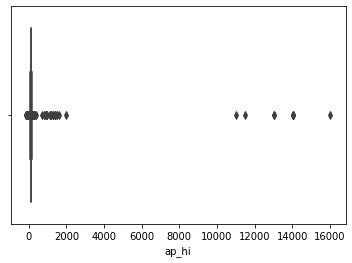

In [47]:
sns.boxplot(df.ap_hi)

Lets check Z-Score for the given dataset to check the score that expresses the value of a distribution in standard deviation with respect to the mean.

In [48]:
#import necessary modules/Library for checking Z Score of the dataset

from scipy.stats import zscore

In [49]:
z=np.abs(zscore(df))
print(z)

[[1.73243929 1.21601824 0.73302344 ... 0.23864069 0.49376463 0.99917784]
 [1.73240428 1.95391548 0.73302344 ... 0.23864069 0.49376463 1.00082284]
 [1.73236927 0.98580185 0.73302344 ... 0.23864069 0.49376463 0.99917784]
 ...
 [1.7338761  0.16325352 1.36421285 ... 4.19040018 2.02525646 1.00082284]
 [1.73394612 1.20061644 0.73302344 ... 0.23864069 2.02525646 1.00082284]
 [1.73398113 0.43417421 0.73302344 ... 0.23864069 0.49376463 0.99917784]]



From above values it is seen that the outliers present in the "ap_hi" column are not making very big difference in the value of standard deviation in z score values so right now no need to remove outliers through this method.We will standardized the given data in later part.

# Checking the Skewness of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002561134C588>,
      dtype=object)

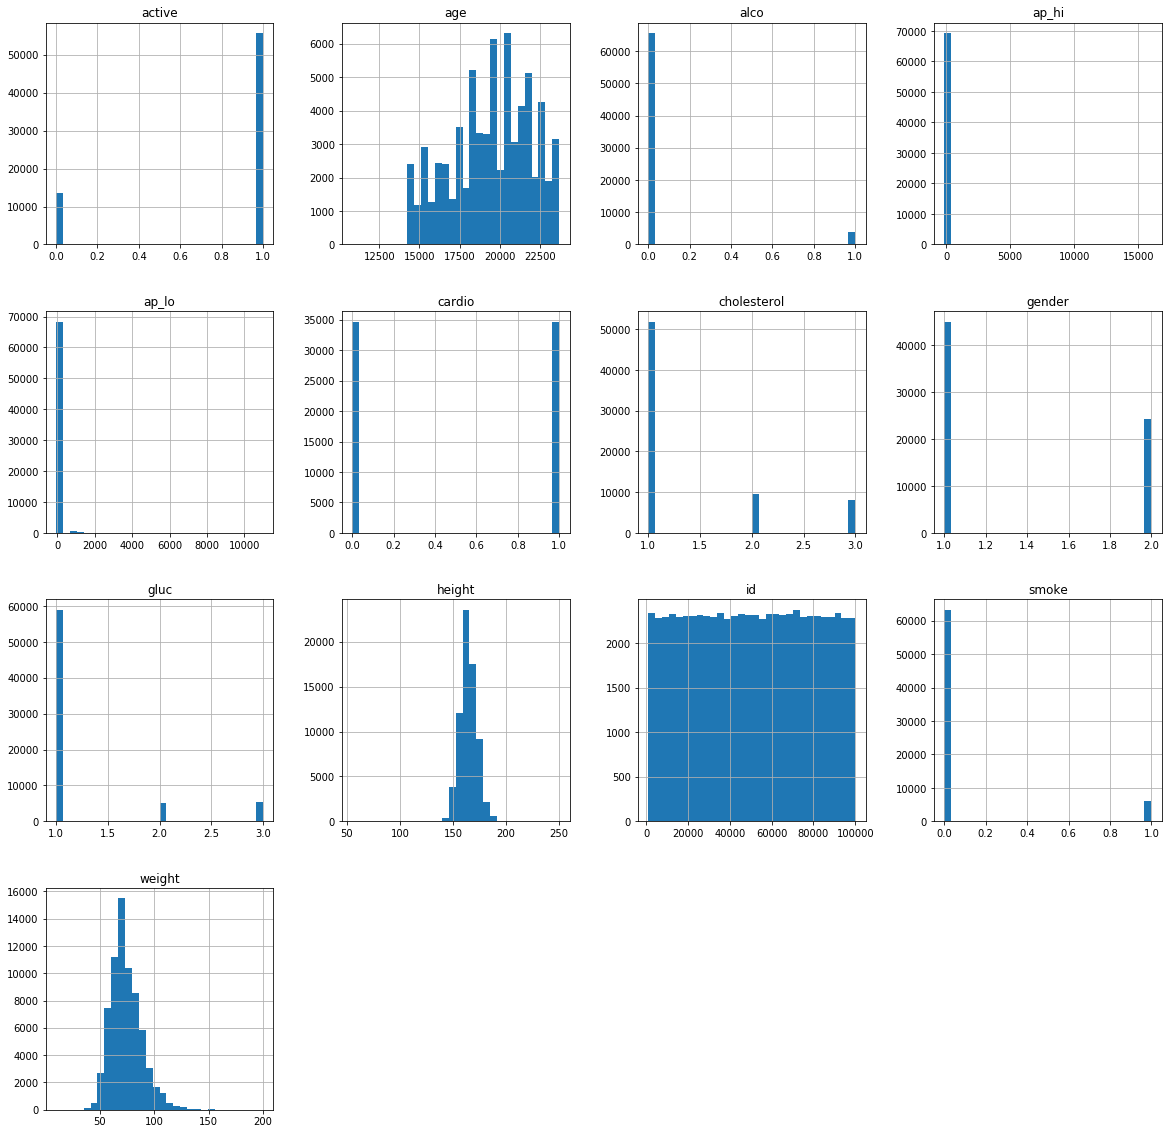

In [50]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

# Checking the Correlation between Features/variables

Let's check the corelation between the target variable and predictor variables

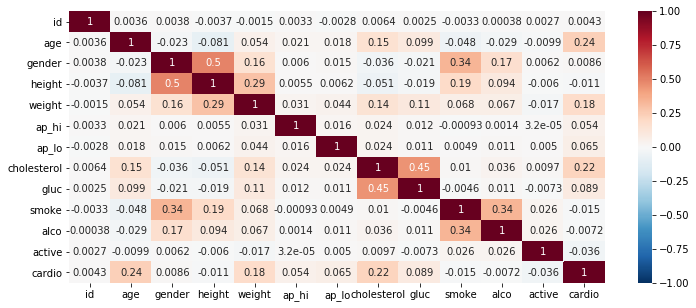

In [51]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [52]:
correlation['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.238095
cholesterol    0.220752
weight         0.182094
gluc           0.089062
ap_lo          0.065290
ap_hi          0.054211
gender         0.008592
id             0.004269
alco          -0.007217
height        -0.011015
smoke         -0.015225
active        -0.035592
Name: cardio, dtype: float64


We can observe that, the 'age, cholesterol, weight ' have maximum corelation with response variable 'cardio'.

This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 3 variables in our future analysis.

# Univariate and Bivariate analysis of Dataset

Let's check how many unique values does the target feature 'cardio' has?

In [53]:
df["cardio"].unique()

array([0, 1], dtype=int64)

And how data is distributed among those values?

In [54]:
df.cardio.value_counts().sort_index()

0    34679
1    34622
Name: cardio, dtype: int64

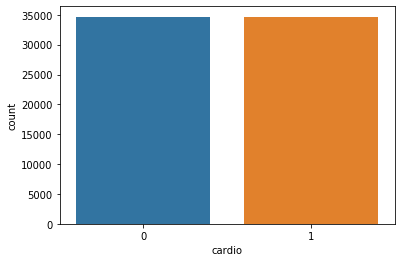

In [55]:
#plotting the graph for visualizing better the distribution of "cardio" variable.
sns.countplot(x='cardio', data=df)

The above distribution shows the range for response variable (cardio) is between equal for both values.

Lets check for distribution pattern between "cardio" and "age" variables

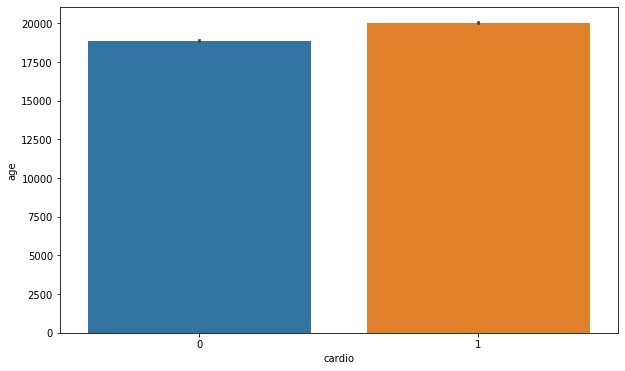

In [56]:
#distribution between "cardio" and "age"
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'cardio', y = 'age', data = df)

Here we see that "age" does not give any specification to classify the "cardio".

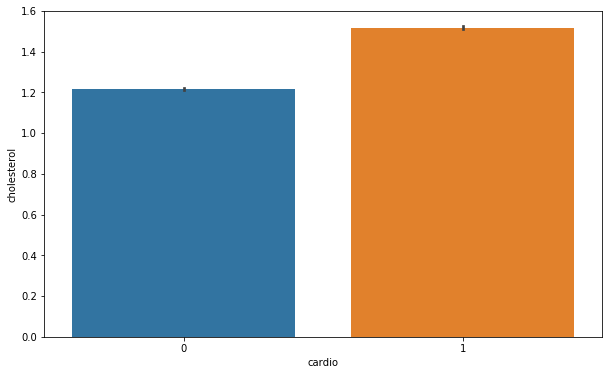

In [57]:
#Lets check the same for "cardio" and "cholesterol" columns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'cardio', y = 'cholesterol', data = df)

we can observe from above that the person having cardiovascular disease has higher cholesterol

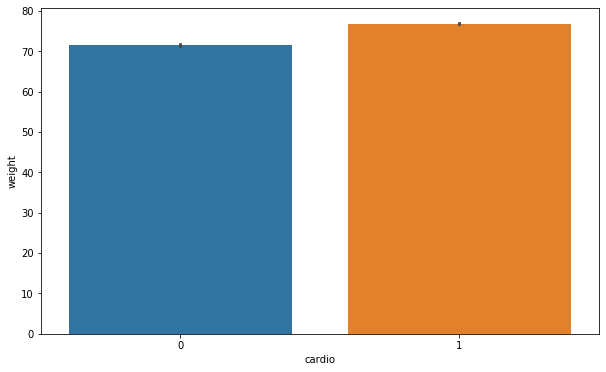

In [58]:
#Now lets check same for "cardio" and "weight" columns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'cardio', y = 'weight', data = df)

more weight for the person having cardiovascular disease

# Train_Test_Split to separate target and input variables

In [59]:
#seperating the dataset as response variable and feature variabes


x = df.drop('cardio', axis = 1)
y = df['cardio']

In [60]:
x.shape

(69301, 12)

In [61]:
y.shape

(69301,)

In [62]:
#train test splitting of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [63]:
x_train.shape

(48510, 12)

In [64]:
x_test.shape

(20791, 12)

In [65]:
y_train.shape

(48510,)

In [66]:
y_test.shape

(20791,)

# Standardization Technique to get optimized results through Standard Scaler

In [67]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Our training and testing data is ready now to perform machine learning algorithm

# Model Selection

The target variable in the given dataset is being converted into classifications hence the problem becomes classification problem.

Therefore the machine learning algorithms of classification can be applied here in for training and testing of data.

We will check for the best model one by one.

# Machine Learning Classification Models to Train and test the Dataset

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [69]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]

In [70]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.7145399451685825
[[7843 2529]
 [3406 7013]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10372
           1       0.73      0.67      0.70     10419

    accuracy                           0.71     20791
   macro avg       0.72      0.71      0.71     20791
weighted avg       0.72      0.71      0.71     20791


 
0.5807801452551585
[[9287 1085]
 [7631 2788]]
              precision    recall  f1-score   support

           0       0.55      0.90      0.68     10372
           1       0.72      0.27      0.39     10419

    accuracy                           0.58     20791
   macro avg       0.63      0.58      0.54     20791
weighted avg       0.63      0.58      0.54     20791


 
0.6017026598047232
[[6808 3564]
 [4717 5702]]
              precision    recall  f1-score   support

           0       0.59      0.66      0.62     10372
           1       0.62      0.55      0.58     10419

    accuracy                          

KeyboardInterrupt: 

# Over Fitting and Under Fitting removal through ML methods

# GridSearch CV

# --- Finding best parameters for our SVC model

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_svc))

In [36]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [37]:
grid_svc.fit(x_train, y_train)

KeyboardInterrupt: 